План работ:
1. Подгрузить данные и объединить в единый фрейм
2. Посмотреть на пропуски в разных столбцах, и если таковых немного удалить
3. В оставшизся пропусках попробовать заполнить логически
4. Удалить явные дубликаты
5. Преобразовать типы данных
6. Обработать категориальные столбца
7. Посмотреть на неявные дубликаты
8. Провести анализ данных

## Исследование данных о российском кинопрокате



In [1]:
import pandas as pd

mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [2]:
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [3]:
mkrf_movies.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
mkrf_shows.head(3)

,puNumber,box_office
0,111000113,2450.0
1,111000115,61040.0
2,111000116,153030013.4


Чтобы объединить фреймы необходимо синхронизировать тип данных общего столбца puNumber    
Поскольку во втором фрейме данных меньше, значит тип данных этого столбца будем привордить во втором фрейме к типу данных этого столбца из первого фрейма

Кроме того, опыт подсказывает, что такие числовые идентификаторы лучше преобразовывать в текстовы тип, чтобы, если идентификатор начинается с 0, этот ноль не пропадал

In [5]:
mkrf_shows['puNumber'] = mkrf_shows['puNumber'].astype(str)

In [6]:
data = mkrf_movies.merge(mkrf_shows, on = 'puNumber', how = 'left')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [8]:
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [9]:
data.describe()

,refundable_support,nonrefundable_support,budget,box_office
count,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


In [10]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

### Шаг 2. Предобработка данных

Необходимо сменить типы данных у следующих столбцов:
show_start_date в datetime
ratings во float

Кроме того, для лучшего восприяти переведем 
refundable_support и nonrefundable_support в тысячи
budget и box_office в миллионы

In [11]:
data['refundable_support'] = data['refundable_support'] / 1000
data['nonrefundable_support'] = data['nonrefundable_support'] / 1000
data['budget'] = data['budget'] / 1000000
data['box_office'] = data['box_office'] / 1000000
data.describe()

,refundable_support,nonrefundable_support,budget,box_office
count,332.000000,332.000000,332.000000,3158.000000
mean,11864.457831,48980.988892,127.229717,76.478696
std,24916.555264,59980.117923,188.588333,240.353123
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25000.000000,42.000000,0.086239
50%,0.000000,30000.000000,68.649916,2.327988
75%,15000.000000,40375.000000,141.985320,23.979671
max,180000.000000,400000.000000,2305.074303,3073.568691


In [12]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
#data['show_start_date'] = data['show_start_date'].dt.date

In [13]:
# Рейтинги не удалось с наскока поменять формат - потому что есть %
# Убираем процент, все переводим в числа, а там где больше 10(где был %) делим на 10, т.к. рейтинги от 0 до 10 (эквивалент от 0% до 100%)
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Рейтинги не удалось с наскока поменять формат - потому что есть %
Убираем процент, все переводим в числа, а там где больше 10(где был %) делим на 10, т.к. рейтинги от 0 до 10 (эквивалент от 0% до 100%)

In [14]:
#data.loc[(data['ratings'].str.contains("%"))&(~data['ratings'].isna()), 'ratings']= data.loc[(data['ratings'].str.contains("%"))&(~data['ratings'].isna()), 'ratings'].str.replace("%", "")

In [15]:
data['ratings'] = data['ratings'].str.replace("%", "")

In [16]:
data['ratings'] = data['ratings'].astype(float)
data.loc[data['ratings'] > 10, 'ratings'] = data.loc[data['ratings'] > 10, 'ratings']/10

In [17]:
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [18]:
pusto = data.isna().sum()
pusto

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Для начала удалим мелочь:
- film_studio                
- production_country          
- director     

Из остальных, вероятно, можно будет заполнить жанр модой, т.к. в этом столбце их относительно немного

In [19]:
data.dropna(subset = ['film_studio'], inplace = True)
data.dropna(subset = ['production_country'], inplace = True)
data.dropna(subset = ['director'], inplace = True)
len(data)

7459

In [20]:
#data.loc[data['ratings'].isna(),'ratings'] = data.loc[~data['ratings'].isna(),'ratings'].median()
#pusto = data.isna().sum()
#pusto

In [21]:
data['genres'].describe()

count      6502
unique      741
top       драма
freq        476
Name: genres, dtype: object

In [22]:
data.loc[data['genres'].isna(),'genres'] = data['genres'].describe()['top']
pusto = data.isna().sum()
pusto

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                  564
age_restriction             0
refundable_support       7127
nonrefundable_support    7127
budget                   7127
financing_source         7127
ratings                   948
genres                      0
box_office               4304
dtype: int64

Чтобы не пропустить неявные дубликаты у категориальных столбцов - приведем все к нижнему регистру, поудаляем спецсимволы и пробелы в начале и конце

In [24]:
cols = ['title', 'type', 'film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'financing_source', 'genres']
for i in cols:
    data[i] = data[i].str.lower()
    data[i] = data[i].str.replace('_', '')
    data[i] = data[i].str.replace('"', '')
    data[i] = data[i].str.replace(' - ', '-')
    data[i] = data[i].str.strip()

In [27]:
data = data.drop_duplicates().reset_index(drop = True)
len(data)

7459

In [28]:
#data_clean= data_without_show_date.merge(show_data, on = 'title', how = 'left')
data.head().sort_values('title')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,киностудия мосфильм,ссср,е.матвеев,NaN,«6+»-для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+»-запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+»-запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+»-запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+»-запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN


Явных дубликатов даже с учетом приведения к нижнему регистру и удаления спецсимволов не обнаружено
Попробуем посмотреть на дубликатьы по прокатному удостоверению

In [29]:
doble_data = data.groupby('puNumber')['puNumber'].count().sort_values(ascending = False)
doble_data

puNumber
221154310     2
221054410     2
 111004112    1
121029218     1
121029414     1
             ..
121003015     1
121003014     1
121003013     1
121003010     1
нет           1
Name: puNumber, Length: 7457, dtype: int64

In [30]:
data.loc[(data['puNumber'] == '221154310')|(data['puNumber'] == '221054410')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4629,как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,художественный,"ше вам, скрипт ассосье, тэ фэ 1 фильм продюксь...",франция,эрик лартиго,"амандин било, алан шаба",«16+»-для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4630,иоанна-женщина на папском престоле /по роману ...,221154310,2010-12-17 12:00:00+00:00,художественный,"константин фильм, а эр ди дегето фильм, дюне ф...",германия-великобритания-италия-испания,зенке вортманн,"оливер бербен, дорис д.хайнце, фарук элтан",«16+»-для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5056,анализируй это!,221054410,2010-05-25 12:00:00+00:00,художественный,"уорнер бразерс, вилладж роудшоу филмз лтд",сша-австралия,хэрольд рэмис,"джейн розенталь, пола уейнстейн",«16+»-для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5057,анализируй то!,221054410,2010-05-25 12:00:00+00:00,художественный,"уорнер бразерс, виллидж роадшоу пикчерз, эн-пи...",сша,гарольд реймис,"джейн розенталь, паул уэйнстейн",«12+»-для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Под одним прокатным удостоверением есть разные фильмы - наверное это возможно, одна лицензия на несколько фильмов
А вот когда под одной лицензией два одинаковых фильма, причем с разным рейтингом.... непонятно как это получается, но делать с этим ничего не буду - это один такой случай, статистку он не исказит даже если  это действительно дубликат

Таким образом, был проведен поиск явных дубликатов:
- приведены к нижнему регистру
- удалены спецсимволы и пробелы
но дубликатов выявлено не было

In [31]:
data['title'].unique()

array(['открытый простор', 'особо важное задание', 'особо опасен', ...,
       'щенячий патруль: скорей спешим на помощь!',
       'машины песенки. серия испанские мотивы',
       'машины песенки. серия когда цветут кактусы'], dtype=object)

In [32]:
data['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', 'музыкально-развлекательный'], dtype=object)

In [33]:
data['film_studio'].unique()

array(['тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз',
       'киностудия мосфильм',
       'юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз',
       ...,
       'дэниел гродник продакшнз, вандерфилм медиа корпорэйшн, импринт интертейнмент, вор хорс интертейнмент, пимиента',
       'никелодеон анимейшн студиос, спин мастер',
       'анимаккорд лтд., ооо студия анимаккорд'], dtype=object)

In [34]:
data['production_country'].unique()

array(['сша', 'ссср', 'франция', 'ссср, венгрия',
       'германия-великобритания', 'великобритания-италия', 'чехословакия',
       'сша-франция-турция', 'новая зеландия', 'канада-франция-испания',
       'сша-германия', 'сша-великобритания', 'великобритания',
       'франция-мексика-сша', 'россия, казахстан, сша', 'ссср, швеция',
       'ссср, франция, англия, куба, гдр', 'германия',
       'великобритания-сша-германия-кнр',
       'ссср, чсср, западный берлин, пнр', 'ссср, италия', 'гонконг, кнр',
       'сша-франция', 'сша-япония-франция-великобритания',
       'гонконг-сингапур-таиланд-великобритания', 'сша-канада',
       'франция-италия-великобритания-сша', 'франция-сша',
       'ирландия-великобритания-германия', 'чехия', 'сша-австралия',
       'ссср, финляндия', 'сша-франция-великобритания-австрия',
       'сша-бельгия', 'сша-ирландия-великобритания', 'великобритания-сша',
       'люксембург-нидерланды-испания-великобритания-сша-италия',
       'великобритания-франция-сша', 'н

In [35]:
data['director'].unique()

array(['кевин костнер', 'е.матвеев', 'тимур бекмамбетов', ...,
       'ник пауэлл', 'а.беляев', 'и.трусов'], dtype=object)

In [36]:
data['producer'].unique()

array(['дэвид валдес, кевин костнер, джейк эбертс', nan,
       'джим лемли, джейсон нетер, марк е.платт, яйн смит', ...,
       'поппи бегум, ник пойнц',
       'джефф боулер, дэниэл гродник, луильо руис, брэт саксон, кирк шоу',
       'дженнифер додж'], dtype=object)

In [37]:
data['age_restriction'].unique()

array(['«18+»-запрещено для детей', '«6+»-для детей старше 6 лет',
       '«12+»-для детей старше 12 лет', '«16+»-для детей старше 16 лет',
       '«0+»-для любой зрительской аудитории'], dtype=object)

In [38]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мелодрам

Много категориальных перечислены через запятую, что может быть сделано в разных порядках.
Отсортируем перечисленные значения и проверим на дубликаты опять

In [39]:
cols = ['title', 'type', 'film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'financing_source', 'genres']
for c in cols:
    data[c] = data[c].fillna('')
    for i in range(len(data[c])):
        h = data.loc[i,c]
        z = sorted(data.loc[i,c].split(','))
        for ii in range(len(z)):
            z[ii] = z[ii].strip()

        data.loc[i, c] = ','.join(sorted(z))
    


In [40]:
data['film_studio'].unique()

array(['бикон пикчерз,кобальт пикчерз,тачстоун пикчерз,тиг продакшнз',
       'киностудия мосфильм',
       'кикстарт продакшнз,марк платт продакшнз,рилейтивити медиа,спайгласс интертейнмент,стилкин филмз,топ кау продакшнз,юниверсал пикчерз',
       ..., 'севен артс продакшнз',
       'вандерфилм медиа корпорэйшн,вор хорс интертейнмент,дэниел гродник продакшнз,импринт интертейнмент,пимиента',
       'никелодеон анимейшн студиос,спин мастер'], dtype=object)

In [41]:
data_clean = data.drop_duplicates().reset_index(drop = True)
len(data_clean)

7459

Дубликатов не выявлено

общий бюджет фильма должен быть не меньше объёма возвратных средств государственной поддержки и объёма невозвратных средств государственной поддержки
Проверим

In [42]:
data_clean.loc[(data_clean['budget']*1000) < (data_clean['refundable_support'] + data_clean['nonrefundable_support'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2050,14+,111023614,2014-12-19 12:00:00+00:00,художественный,ооо киностудия сентябрь,россия,а.зайцев,"а.зайцев,о.гранина",«16+»-для детей старше 16 лет,0.0,23000.000,0.0,"министерство культуры,фонд кино",6.6,мелодрама,10.234016
2055,дуxless 2,111000415,2015-01-26 12:00:00+00:00,художественный,"ооо арт пикчерс студия,ооо киностудия слово",россия,р.прыгунов,"д.рудовский,п.ануров,ф.бондарчук",«16+»-для детей старше 16 лет,0.0,75000.000,0.0,фонд кино,6.6,драма,446.163511
2469,воин (2015),111017315,2015-09-28 12:00:00+00:00,художественный,"ооо арт пикчерс студия,ооо форпост продакшн",россия,а.андрианов,ооо арт пикчерс студия,«12+»-для детей старше 12 лет,10000.0,70000.000,0.0,фонд кино,7.8,"боевик,драма,криминал",196.572438
2529,бармен.,111009615,2015-05-26 12:00:00+00:00,художественный,"ао вайт медиа,ооо арт пикчерс студия",россия,д.штурманова,т.вайнштейн,«16+»-для детей старше 16 лет,20000.0,0.000,0.0,фонд кино,6.2,"комедия,фэнтези",67.418975
2612,савва. сердце воина,114001715,2015-07-21 12:00:00+00:00,анимационный,"ооо арт пикчерс студия,ооо глюкоза продакшн",россия,м.фадеев,а.чистяков,«6+»-для детей старше 6 лет,60000.0,100000.000,0.0,фонд кино,4.6,"мультфильм,приключения,фэнтези",184.487551
2681,тряпичный союз,111010215,2015-06-08 12:00:00+00:00,художественный,ооо кинокомпания коктебель,россия,м.местецкий,"а.кушаев,р.борисевич",«18+»-запрещено для детей,0.0,59000.000,0.0,фонд кино,6.3,"драма,комедия",1.957739
2785,срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,художественный,"ао вайт медиа,ооо арт пикчерс студия",россия,с чекалов,"д.рудовский,т.вайнштейн,ф.бондарчук",«16+»-для детей старше 16 лет,0.0,35000.000,0.0,фонд кино,5.1,"комедия,мелодрама",72.937783
2871,помню-не помню!,111004916,2016-03-01 12:00:00+00:00,художественный,ооо кинофирма,россия,в.ровенский,ооо кинофирма,«12+»-для детей старше 12 лет,0.0,6000.000,0.0,министерство культуры,4.3,комедия,15.362931
3044,любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,художественный,"ао вайт медиа,ооо арт пикчерс студия",россия,д.тюрин,"д.рудовский,т.вайнштейн,ф.бондарчук",«16+»-для детей старше 16 лет,19000.0,51000.000,0.0,фонд кино,6.3,"комедия,мелодрама",70.299052
3561,притяжение (2016),111018116,2016-12-16 12:00:00+00:00,художественный,"ооо арт пикчерс студия,ооо водород 2011",россия,ф.бондарчук,ооо арт пикчерс студия,«12+»-для детей старше 12 лет,0.0,250000.000,0.0,фонд кино,5.6,фантастика,1038.321489


In [43]:
#Таковых немного - удаляем
data_clean = data_clean.loc[~((data_clean['budget']*1000) < (data_clean['refundable_support'] + data_clean['nonrefundable_support']))]
#data_clean.loc[(data_clean['budget']*1000) < (data_clean['refundable_support'] + data_clean['budget'])]
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7442 entries, 0 to 7458
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7442 non-null   object             
 1   puNumber               7442 non-null   object             
 2   show_start_date        7442 non-null   datetime64[ns, UTC]
 3   type                   7442 non-null   object             
 4   film_studio            7442 non-null   object             
 5   production_country     7442 non-null   object             
 6   director               7442 non-null   object             
 7   producer               7442 non-null   object             
 8   age_restriction        7442 non-null   object             
 9   refundable_support     315 non-null    float64            
 10  nonrefundable_support  315 non-null    float64            
 11  budget                 315 non-null    float64          

In [44]:
data_clean['show_start_date_year'] = data_clean['show_start_date'].dt.year
data_clean.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"бикон пикчерз,кобальт пикчерз,тачстоун пикчерз...",сша,кевин костнер,"джейк эбертс,дэвид валдес,кевин костнер",«18+»-запрещено для детей,NaN,NaN,NaN,,7.2,"боевик,драма,мелодрама",NaN,2015
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,киностудия мосфильм,ссср,е.матвеев,,«6+»-для детей старше 6 лет,NaN,NaN,NaN,,6.6,"военный,драма",NaN,2016
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"кикстарт продакшнз,марк платт продакшнз,рилейт...",сша,тимур бекмамбетов,"джейсон нетер,джим лемли,марк е.платт,яйн смит",«18+»-запрещено для детей,NaN,NaN,NaN,,6.8,"боевик,триллер,фантастика",NaN,2016


In [45]:
s = data_clean['director'].str.split(',')
data_clean['main_director'] = s.str[0]
s = data_clean['genres'].str.split(',')
data_clean['main_genres'] = s.str[0]
data_clean.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year,main_director,main_genres
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"бикон пикчерз,кобальт пикчерз,тачстоун пикчерз...",сша,кевин костнер,"джейк эбертс,дэвид валдес,кевин костнер",«18+»-запрещено для детей,NaN,NaN,NaN,,7.2,"боевик,драма,мелодрама",NaN,2015,кевин костнер,боевик
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,киностудия мосфильм,ссср,е.матвеев,,«6+»-для детей старше 6 лет,NaN,NaN,NaN,,6.6,"военный,драма",NaN,2016,е.матвеев,военный
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"кикстарт продакшнз,марк платт продакшнз,рилейт...",сша,тимур бекмамбетов,"джейсон нетер,джим лемли,марк е.платт,яйн смит",«18+»-запрещено для детей,NaN,NaN,NaN,,6.8,"боевик,триллер,фантастика",NaN,2016,тимур бекмамбетов,боевик
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"кикстарт продакшнз,марк платт продакшнз,рилейт...",сша,тимур бекмамбетов,"джейсон нетер,джим лемли,марк е.платт,яйн смит",«18+»-запрещено для детей,NaN,NaN,NaN,,6.8,"боевик,триллер,фантастика",NaN,2016,тимур бекмамбетов,боевик
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"кикстарт продакшнз,марк платт продакшнз,рилейт...",сша,тимур бекмамбетов,"джейсон нетер,джим лемли,марк е.платт,яйн смит",«18+»-запрещено для детей,NaN,NaN,NaN,,6.8,"боевик,триллер,фантастика",NaN,2015,тимур бекмамбетов,боевик


In [46]:
data_clean['gos_share'] = (data_clean['refundable_support'] + data_clean['nonrefundable_support']) / (data_clean['budget']*1000)
data_clean.loc[~data_clean['gos_share'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year,main_director,main_genres,gos_share
1280,пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,ано содействия развитию кинематографии ангел-ф...,россия,а.атанесян,"а.атанесян,м.бабаханов,р.бутко",«16+»-для детей старше 16 лет,0.0,26500.000,79.411900,министерство культуры,8.1,"драма,мелодрама",0.365354,2013,а.атанесян,драма,0.333703
1446,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,ооо компания атк-студио,россия,а.якимчук,а.тютрюмов,«12+»-для детей старше 12 лет,0.0,26000.000,37.142857,министерство культуры,NaN,драма,0.028140,2014,а.якимчук,драма,0.700000
1496,невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,ооо компания реал-дакота,россия,"р.давлетьяров,с.комаров","а.котелевский,а.олейников,р.давлетьяров",«12+»-для детей старше 12 лет,0.0,107847.945,176.023490,фонд кино,5.3,"комедия,фантастика",19.957031,2013,р.давлетьяров,комедия,0.612691
1522,берцы,111004314,2014-05-05 12:00:00+00:00,художественный,ооо студия пассажир,россия,е.миндадзе (псевдоним катя шагалова),л.антонова,«16+»-для детей старше 16 лет,0.0,28000.000,40.574140,министерство культуры,4.2,драма,0.055918,2014,е.миндадзе (псевдоним катя шагалова),драма,0.690095
1789,братья ч,111004414,2014-04-23 12:00:00+00:00,художественный,ооо студия пассажир,россия,м.угаров,"а.миндадзе,л.антонова",«16+»-для детей старше 16 лет,0.0,25000.000,40.015122,министерство культуры,6.4,драма,0.232100,2014,м.угаров,драма,0.624764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,союз спасения,111022019,2019-12-26 12:00:00+00:00,художественный,зао дирекция кино,россия,а.кравчук,"а.максимов,к.эрнст",«12+»-для детей старше 12 лет,100000.0,400000.000,980.000000,фонд кино,6.0,"биография,драма,история",717.703186,2019,а.кравчук,биография,0.510204
7439,иван царевич и серый волк 4,114005019,2019-12-20 12:00:00+00:00,анимационный,ооо студия анимационного кино мельница,россия,"д.шмидт,к.феоктистов","а.боярский,с.сельянов",«6+»-для детей старше 6 лет,100000.0,0.000,190.000000,фонд кино,6.7,"мультфильм,приключения,семейный",501.069235,2019,д.шмидт,мультфильм,0.526316
7447,вторжение,111022519,2019-12-23 12:00:00+00:00,художественный,"ооо арт пикчерс студия,ооо водород 2011",россия,ф.бондарчук,"а.андрющенко,д.рудовский,м.врубель,ф.бондарчук",«12+»-для детей старше 12 лет,100000.0,400000.000,944.000000,фонд кино,5.7,"боевик,фантастика",NaN,2019,ф.бондарчук,боевик,0.529661
7449,я свободен,111023019,2019-12-26 12:00:00+00:00,художественный,ао тпо киностудия им. м.горького,россия,и.северов,с.зернов,«12+»-для детей старше 12 лет,0.0,30000.000,46.154000,министерство культуры,5.9,драма,NaN,2019,и.северов,драма,0.649998


### Шаг 3. исследовательский анализ данных


In [47]:
films_count=data_clean.groupby('show_start_date_year')['show_start_date_year'].count()
#films_count = pd.DataFrame({'year':films_count.index, 'count':films_count.values})
films_count

show_start_date_year
2010    980
2011    620
2012    592
2013    629
2014    805
2015    699
2016    814
2017    503
2018    875
2019    925
Name: show_start_date_year, dtype: int64

<AxesSubplot:xlabel='show_start_date_year'>

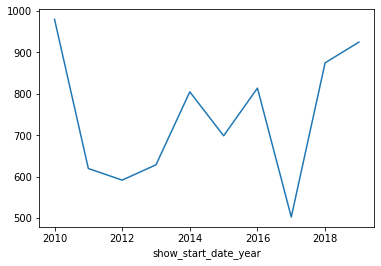

In [48]:
films_count.plot(kind = 'line', alpha = 1)

Складывается впечатление, что выпуск фильмов в прокат цикличен
Возможно, при хорошей экономической ситуации закладываентся больше средств на производство фильмов, и в моменты наступления кризисов количество фильмов в прокате достигает пика
В моменты кризиса производство фильмов падает, соответственно выход в прокат снижается и достигает нижнего пика в моменты хорошей экономической ситуации

In [49]:
data_clean_box_office_share = data_clean.pivot_table(index='show_start_date_year', values=['title', 'box_office'], aggfunc=['count'])#.reset_index()
data_clean_box_office_share.columns = [ 'box_office_count', 'total_count']
data_clean_box_office_share['box_office_share'] = data_clean_box_office_share['box_office_count'] / data_clean_box_office_share['total_count']
data_clean_box_office_share

,box_office_count,total_count,box_office_share
show_start_date_year,,,
2010,105,980,0.107143
2011,109,620,0.175806
2012,127,592,0.214527
2013,184,629,0.292528
2014,278,805,0.345342
2015,459,699,0.656652
2016,522,814,0.641278
2017,355,503,0.705765
2018,470,875,0.537143


<AxesSubplot:xlabel='show_start_date_year'>

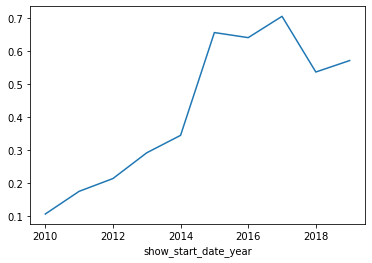

In [50]:
data_clean_box_office_share['box_office_share'].plot(kind = 'line', alpha = 1)

Динамика, ожидаемо восходящая. Думаю это связано с улучшением качества накапливаемых данных
Наиболее полно по кассовым сборам представлен период с 2015 по 2017 годы

In [51]:
data_clean.loc[(~data_clean['box_office'].isna())&(data_clean['box_office'] > 1)].sort_values('box_office')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year,main_director,main_genres,gos_share
2428,племя.,131000614,2014-12-29 12:00:00+00:00,художественный,гармата филм продакшн,украина-нидерланды,мирослав слабошпицкий,"валентин васянович,елена слабошпицкая,ия мысли...",«18+»-запрещено для детей,NaN,NaN,NaN,,6.4,"драма,криминал",1.003723,2014,мирослав слабошпицкий,драма,NaN
2860,клан (2015),121002816,2016-02-11 12:00:00+00:00,художественный,"ка и эс фильм,крамер и сигман фильм,матанза си...",аргентина-испания,пабло троперо,"августин альмодовар,педро альмодовар,уго сигма...",«18+»-запрещено для детей,NaN,NaN,NaN,,6.1,"драма,криминал,триллер",1.007437,2016,пабло троперо,драма,NaN
6532,любовь и прочий зоопарк,121029718,2018-12-27 12:00:00+00:00,художественный,"агат фильм / си,ареми продюксьон,ля банк поста...",франция-бельгия,антони кордье,николас бланк,«18+»-запрещено для детей,NaN,NaN,NaN,,5.9,"комедия,мелодрама",1.012749,2018,антони кордье,комедия,NaN
2851,взорвать гитлера,121005716,2016-03-23 12:00:00+00:00,художественный,"а эр дэ дегето филм,алболина филм,арт,байришер...",германия,оливер хиршбигель,"манфред хаттендорф,фред брайнерсдорфер",«18+»-запрещено для детей,NaN,NaN,NaN,,6.7,"военный,драма,история",1.012971,2016,оливер хиршбигель,военный,NaN
7108,дефолт,121022419,2019-08-15 12:00:00+00:00,художественный,"зип синема,си джи интертейнмент",южная корея,чхве гук-хи,"ли ю-джин,о хё-джин",«18+»-запрещено для детей,NaN,NaN,NaN,,6.8,"драма,история",1.015408,2019,чхве гук-хи,драма,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,пираты карибского моря: мертвецы не рассказыва...,121009217,2017-05-17 12:00:00+00:00,художественный,"джерри брукхаймер филмз,инфинитум нихил,уолт д...",сша,"йоаким реннинг,эспен сандберг",джерри брукхаймер,«16+»-для детей старше 16 лет,NaN,NaN,NaN,,6.6,"боевик,комедия,фэнтези",2118.396119,2017,йоаким реннинг,боевик,NaN
6526,т-34,111024918,2018-12-21 12:00:00+00:00,художественный,"ооо амедиа продакшн и ао телекомпания,ооо кино...",россия,а.сидоров,"а.златопольский,л.блаватник,н.михалкова,н.ярал...",«12+»-для детей старше 12 лет,60000.0,120000.0,563.784717,фонд кино,6.5,"боевик,военный,драма",2271.754005,2018,а.сидоров,боевик,0.319271
6793,мстители: финал,121005519,2019-04-29 12:00:00+00:00,художественный,марвел студиос,сша,"джо руссо,энтони руссо",кевин фейги,«16+»-для детей старше 16 лет,NaN,NaN,NaN,,7.6,"боевик,драма,фантастика",2576.613777,2019,джо руссо,боевик,NaN
5642,движение вверх,111011817,2017-12-21 12:00:00+00:00,художественный,ооо студия тритэ никиты михалкова,россия,а.мегердичев,"а.златопольский,л.верещагин,н.михалков,ооо сту...",«6+»-для детей старше 6 лет,0.0,400000.0,590.192191,фонд кино,7.5,"драма,спорт",2779.686144,2017,а.мегердичев,драма,0.677745


In [52]:
data_clean_box_office_stat = data_clean.loc[data_clean['box_office']>1, ['show_start_date_year', 'box_office']].pivot_table(index='show_start_date_year', values=['box_office'], aggfunc=['sum', 'median', 'mean', 'min', 'max'])#.reset_index()
data_clean_box_office_stat.columns = ['sum', 'median', 'mean', 'min', 'max']
data_clean_box_office_stat

,sum,median,mean,min,max
show_start_date_year,,,,,
2010,1.446400,1.446400,1.446400,1.446400,1.446400
2011,11.618085,11.618085,11.618085,11.618085,11.618085
2012,2.311220,2.311220,2.311220,2.311220,2.311220
2013,25.360467,4.321638,8.453489,1.081797,19.957031
2014,7411.402802,21.446205,130.024611,1.003723,1016.410635
2015,38491.960769,16.184128,116.996841,1.052549,1658.861425
2016,46695.258344,15.997809,128.637075,1.007437,2048.126108
2017,48433.385037,18.085072,162.528138,1.067649,2779.686144
2018,49222.020002,13.839305,122.139007,1.012749,2271.754005


<AxesSubplot:xlabel='show_start_date_year'>

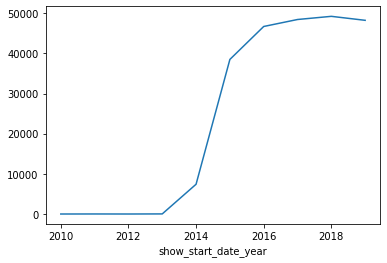

In [53]:
data_clean_box_office_stat['sum'].plot(kind = 'line', alpha = 1)

In [54]:
a = data_clean_box_office_stat.sort_values('sum', ascending = True).head(1).reset_index()
min_ = a.loc[0,'show_start_date_year']

a = data_clean_box_office_stat.sort_values('sum', ascending = False).head(1).reset_index()
max_ = a.loc[0,'show_start_date_year']

print(min_, max_)

2010 2018


Общая динамика сборов ожидаемо растет.
Это связано и с все большим количеством фильмов, и с лучшей заполненностью данных

Минимальное сборы были в 2010
Максимальные - в 2018

<AxesSubplot:xlabel='show_start_date_year'>

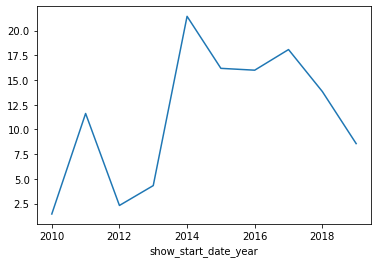

In [55]:
data_clean_box_office_stat['median'].plot(kind = 'line', alpha = 1)

<AxesSubplot:xlabel='show_start_date_year'>

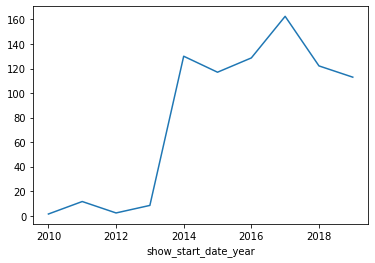

In [56]:
data_clean_box_office_stat['mean'].plot(kind = 'line', alpha = 1)

И среднее и медианное значение показывают схожую динамику
Значит дело не только в заполненности данных, но и действительно - кассовые сборы фильмов увеличиваются.
И главно причиной здесь скорее всего является увеличение в прокате количества фильмов

array([[<AxesSubplot:title={'center':'box_office'}>]], dtype=object)

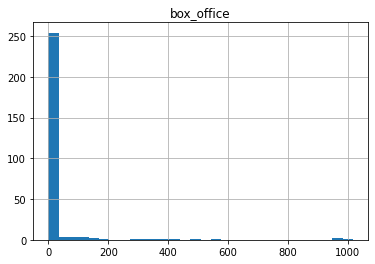

In [57]:
data_clean.loc[data_clean['show_start_date_year']==2014, ['box_office']].sort_values('box_office', ascending = False)#.hist(bins = 30)
data_clean.loc[data_clean['show_start_date_year']==2014, ['box_office']].hist(bins = 30)

<AxesSubplot:>

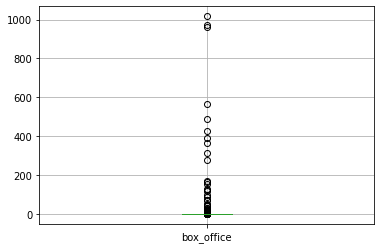

In [58]:
data_clean.loc[data_clean['show_start_date_year']==2014, ['box_office']].boxplot(column=['box_office'])

C 2013 года медиана и среднее разнятся потому что увеличивается разброс между максимальным и минимальным значениями по кассовым сборам - выходят фильмы-хиты, которые значительно превышают сборы всех остальных.
Тогда как большинство фильмов имеют низкий успех

Я отфильтровал фильмы, которые собирают больше 1 млн. рублей и все равно большинство фильмов собирают в районе самой низкой отметки - 1 млн.

In [59]:
data_clean_box_office_lims = data_clean.pivot_table(index='show_start_date_year', columns = 'age_restriction', values=['box_office'], aggfunc=['sum'])#.reset_index()
#data_clean_box_office_lims.columns = ['sum', 'median', 'mean']
data_clean_box_office_lims

sum  \
                                               box_office   
age_restriction      «0+»-для любой зрительской аудитории   
show_start_date_year                                        
2010                                             1.887611   
2011                                            13.499871   
2012                                             2.222133   
2013                                             2.710302   
2014                                           375.562258   
2015                                           379.054578   
2016                                           150.034322   
2017                                           229.598930   
2018                                            32.449002   
2019                                            17.746067   

                                                    \
                                                     
age_restriction      «12+»-для детей старше 12 лет   
show_start_date_year                                 
2010                                      0.120146   
2011                                      0.219891   
2012                                      0.108734   
2013                                     20.910337   
2014                                   2584.782324   
2015                                  13419.509571   
2016                                  11150.762104   
2017                                   7851.427661   
2018                                  14267.250436   
2019                                  12680.198774   

                                                                              \
                                                                               
age_restriction      «16+»-для детей старше 16 лет «18+»-запрещено для детей   
show_start_date_year                                                           
2010                                      0.366512                  0.054385   
2011                                      0.381513                  0.001040   
2012                                      3.254216                  0.182580   
2013                                      0.658070                  5.161246   
2014                                    534.046071               2209.712747   
2015                                  10781.600601               5430.350629   
2016                                  16594.249490               6793.929819   
2017                                  18694.590951               9651.495581   
2018                                  16278.405947               8760.085501   
2019                                  12753.418985              10121.796304   

                                                  
                                                  
age_restriction      «6+»-для детей старше 6 лет  
show_start_date_year                              
2010                                         NaN  
2011                                    0.000450  
2012                                    1.143410  
2013                                    0.359752  
2014                                 1730.614443  
2015                                 8517.311820  
2016                                12053.146008  
2017                                12031.034131  
2018                                 9913.759294  
2019                                12704.941824

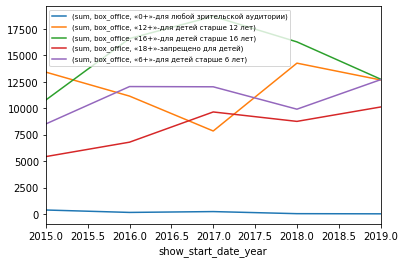

In [60]:
data_clean_box_office_lims.plot(kind = 'line', alpha = 1, xlim=[2015, 2019]).legend(loc=2, prop={'size': 7})

Объемы сборов разнятся для каждой из зрительских категорий.
Вероятно, это связано с величиной той или иной категорией.

Самая малочисленная аудитория у фильмов 0+, т.к. по большей степени это детские фильмы
Самая многочисленная аудитория у фильмов 16+ - вероятно это оптимальное сочетание по уровню бюджета фильма и охвата населения, которому достпны такие фильмы

### Шаг 4. фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [61]:
data_clean['financing_source'].unique()

array(['', 'министерство культуры', 'фонд кино',
       'министерство культуры,фонд кино'], dtype=object)

In [62]:
data_clean.loc[~data_clean['financing_source'].isna()].head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year,main_director,main_genres,gos_share
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"бикон пикчерз,кобальт пикчерз,тачстоун пикчерз...",сша,кевин костнер,"джейк эбертс,дэвид валдес,кевин костнер",«18+»-запрещено для детей,NaN,NaN,NaN,,7.2,"боевик,драма,мелодрама",NaN,2015,кевин костнер,боевик,NaN
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,киностудия мосфильм,ссср,е.матвеев,,«6+»-для детей старше 6 лет,NaN,NaN,NaN,,6.6,"военный,драма",NaN,2016,е.матвеев,военный,NaN
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"кикстарт продакшнз,марк платт продакшнз,рилейт...",сша,тимур бекмамбетов,"джейсон нетер,джим лемли,марк е.платт,яйн смит",«18+»-запрещено для детей,NaN,NaN,NaN,,6.8,"боевик,триллер,фантастика",NaN,2016,тимур бекмамбетов,боевик,NaN


<AxesSubplot:xlabel='show_start_date_year'>

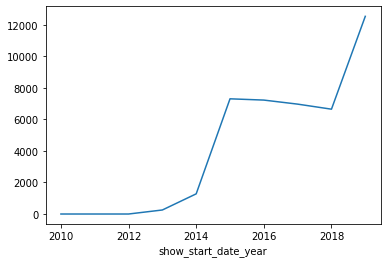

In [63]:
data_clean_gosporg = data_clean.loc[~data_clean['financing_source'].isna()]
temp_table = data_clean_gosporg.pivot_table(index='show_start_date_year', values=['budget'], aggfunc=['sum'])#.reset_index()
temp_table.columns = ['budget']
temp_table['budget'].plot(kind = 'line', alpha = 1)

Объем гос поддержки при производстве фильмов растет с течением времени

<AxesSubplot:xlabel='show_start_date_year'>

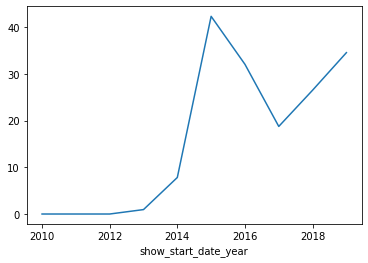

In [64]:
temp_table = data_clean_gosporg.pivot_table(index='show_start_date_year', values=['gos_share'], aggfunc=['sum'])#.reset_index()
temp_table.columns = ['gos_share']
temp_table['gos_share'].plot(kind = 'line', alpha = 1)

Доля господдержки в фильмах в среднем не превышаети 40%

In [65]:
temp_table = data_clean_gosporg.pivot_table(index='main_genres', values = ['title'], aggfunc=['count'])
temp_table.columns = ['title']
temp_table.sort_values('title', ascending = False)

,title
main_genres,
драма,3006
комедия,1243
боевик,1173
детектив,376
биография,312
триллер,204
документальный,173
мультфильм,163
военный,147


Больше всего госсредств выделяется на мелодрамы

In [66]:
temp_table = data_clean_gosporg.pivot_table(index='age_restriction', values = ['title'], aggfunc=['count'])
temp_table.columns = ['title']
temp_table.sort_values('title', ascending = False)

,title
age_restriction,
«16+»-для детей старше 16 лет,2841
«18+»-запрещено для детей,1600
«12+»-для детей старше 12 лет,1581
«0+»-для любой зрительской аудитории,803
«6+»-для детей старше 6 лет,617


Учитывая, что по большей части госсредства выделяются на мелодрамы, то аудитория фильмов категории 16+ также ожидаемо наибольшая в доле всех фильмов с госучастием

<AxesSubplot:xlabel='show_start_date_year'>

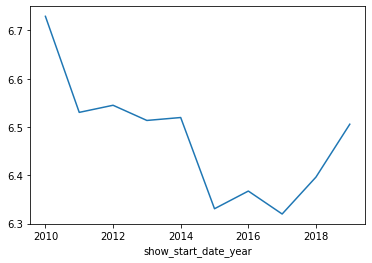

In [67]:
temp_table = data_clean_gosporg.pivot_table(index='show_start_date_year', values = ['ratings'], aggfunc=['mean'])
temp_table.columns = ['ratings']
temp_table['ratings'].plot(kind = 'line', alpha = 1)

А вот рейтинги фильмов с госучастием чуть выше среднего. и при этом еще и снижается
Вероятно, окупаемость будет показывать аналогичную картинку

<AxesSubplot:xlabel='show_start_date_year'>

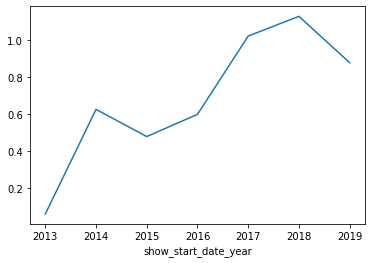

In [68]:
data_clean_gosporg['rentab'] = data_clean_gosporg['box_office'] / data_clean_gosporg['budget']
temp_table = data_clean_gosporg.pivot_table(index='show_start_date_year', values = ['rentab'], aggfunc=['mean'])
temp_table.columns = ['rentab']
temp_table['rentab'].plot(kind = 'line', alpha = 1)

Учитывая низкие рейтинги фильмов с госучастием, их оккупаемость оставляет жедлать лучшего

In [69]:
temp_table = data_clean_gosporg.pivot_table(index='director', values = ['gos_share'], aggfunc=['count'])
temp_table.columns = ['gos_share']
temp_table.sort_values('gos_share', ascending = False).head(10)

,gos_share
director,
с.андреасян,4
р.давлетьяров,4
д.дьяченко,4
с.мокрицкий,3
к.шипенко,3
а.аксененко,3
к.худяков,2
ф.дмитриев,2
м.расходников,2


Не знаю, кто эти люди... Наверное у них хорошая харизма... или знакомства

### Шаг 5.  общий вывод

1. ОБъем выпускаемых фильмов как и любой экономическитй процесс подвержен цикличности
При этом в год оборот фильмом не превышает и 1000 картин
2. Объем кассовых сборов по фильмам увеличивается с течением времени, скорее всего, по причине улучшения качества заполнения данных
3. Объемы сборов разнятся для каждой категории фильмов по ограничениям. Самые низкие сборы у фльмоав 0+, самые высокие - у 16+, вероятно, из-за разной численности категорий зрителей
4. Наиболее популярным жанром фильмов является драма
5. Абсолютный объем господдержки фильмов с госучастием увеличивается с течением времени, однако это скорее всего связано с инфляцией, т.к. доля господдержки условно постоянна и не превышает 40%
6. Качество фильмов с господдержкой слабое, т.к. их ретйинг чуть выше среднего, неудивительно, что такие фильмы редко окупаются
7. С 2013 года начинают появляться фильмы-хиты, сборы которых кардинально отличаются от основной массы фильмов


Какие дополнительные исследования можно было бы провести:
- рентабельность фильмов по жанрам - воозможно какие-то жанры фильмов все же более успешны на фоне остальных (в том числе и по фильмам с господдержкой отдельно)